# Seed analysis
Here, the data gathered for the inspecting the model's sensitivity to stochastics will be analyzed.

# 1. Quantile Data // calculate it and save it

In [1]:
import pandas as pd
import os
from model.enums import BeliefUpdate
from dmdu.utils_dmdu import make_sure_path_exists, calculate_quantiles

In [2]:
# Parameters
need_quantile_data = False
considered_quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]


In [3]:
# Quantile Data // calculate it and save it
if need_quantile_data:  # only if it really should be re-calculated
    for belief_update_fn in list(BeliefUpdate):
        # Loading data
        path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name, 'outcomes.csv')
        outcomes = pd.read_csv(path)
        outcomes = outcomes.rename(columns={'Unnamed: 0': 'uncert_sample'})
        outcome_names = [o for o in outcomes.columns if o not in ['uncert_sample', 'seed']]

        for outcome in outcome_names:
            quantile_data = calculate_quantiles(outcomes_data=outcomes, outcome=outcome, quantiles=considered_quantiles)

            # Save resulting data into csv
            dir_path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name, 'quantiles')
            make_sure_path_exists(dir_path)
            file_name = str(outcome) + '.csv'
            path = os.path.join(dir_path, file_name)
            quantile_data.to_csv(path)


# 2. Plotting

In [4]:
from dmdu.exploration.seed_analysis_utils import get_data, plot_quartiles, plot_quartiles_metric_bufn_combo

### a) 'avg_user_effort'

In [5]:
metric = 'avg_user_effort'
y_max = 80
y_min = 20

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

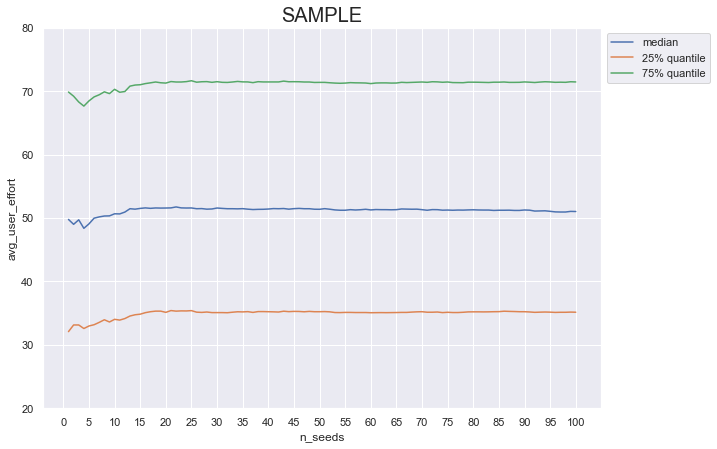

In [6]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

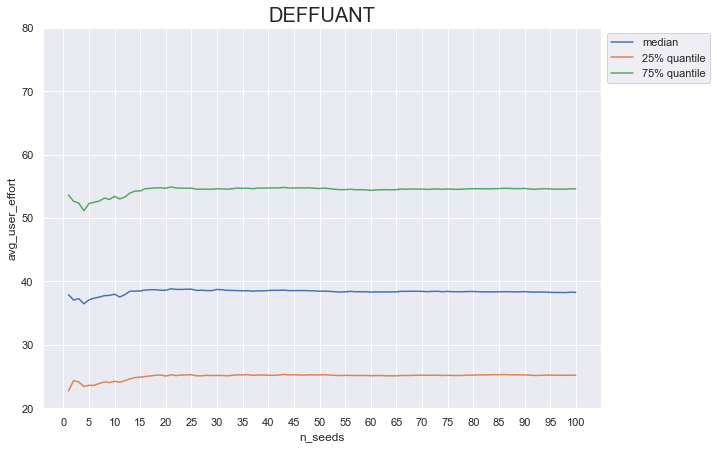

In [7]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

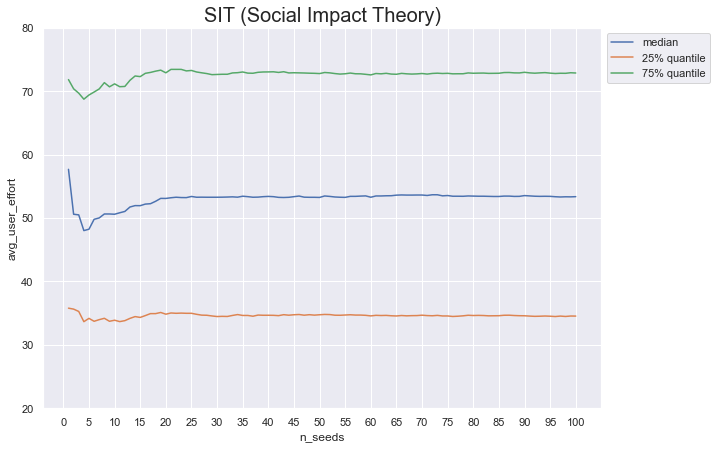

In [8]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

### b) 'engagement'

In [9]:
metric = 'engagement'
y_max = 600
y_min = 100

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

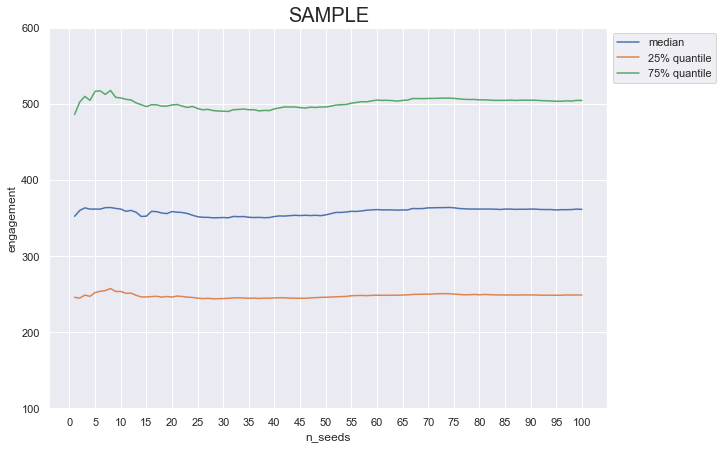

In [10]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

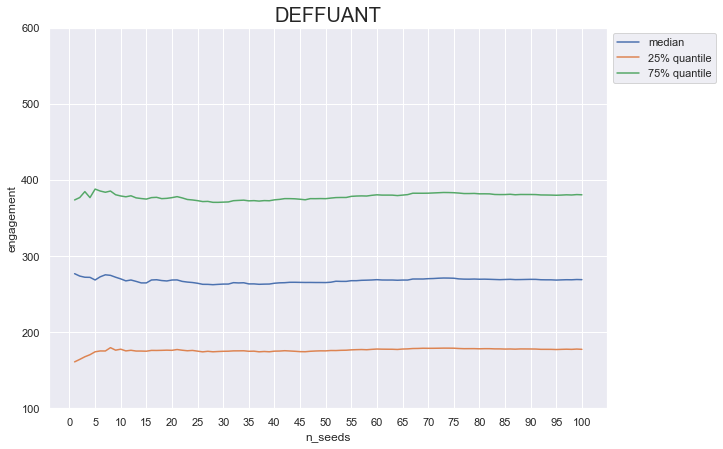

In [11]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

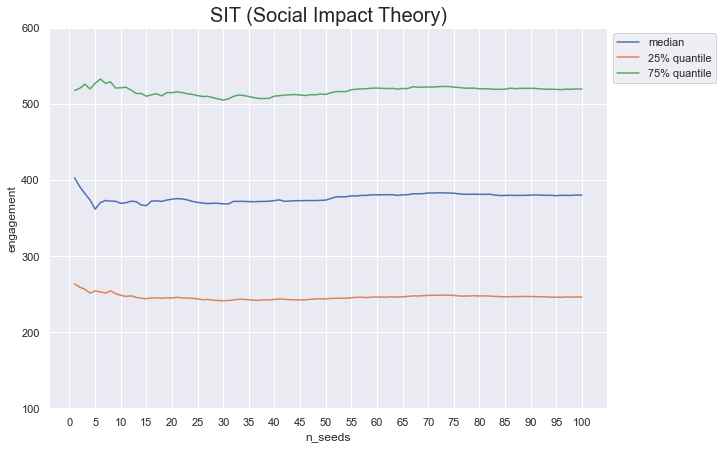

In [12]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

### c) 'free_speech_constraint'

In [13]:
metric = 'free_speech_constraint'
y_max = 0.4

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

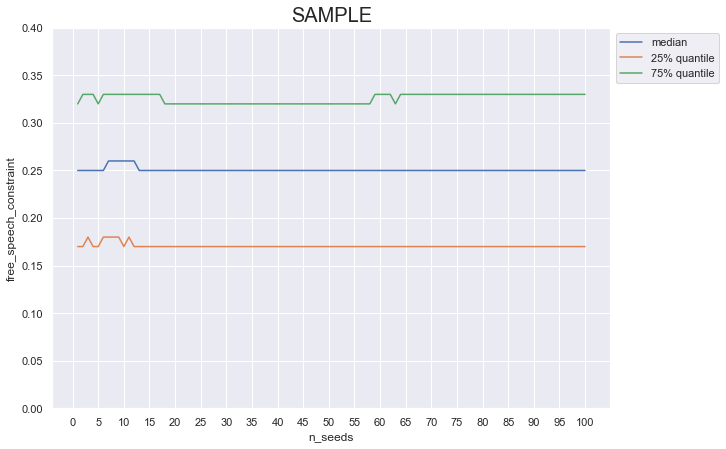

In [14]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

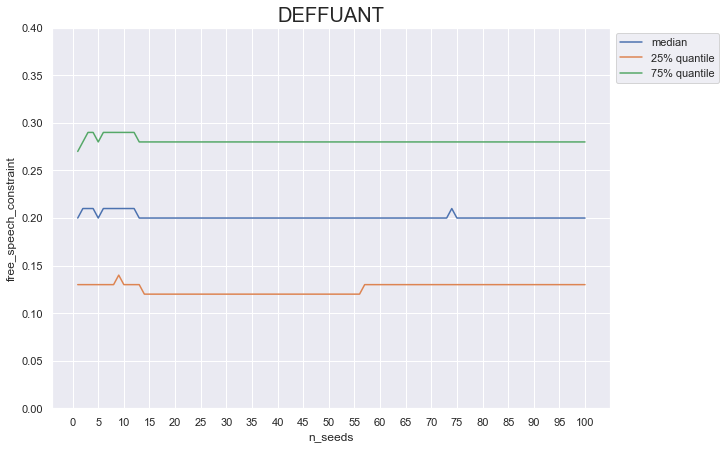

In [15]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

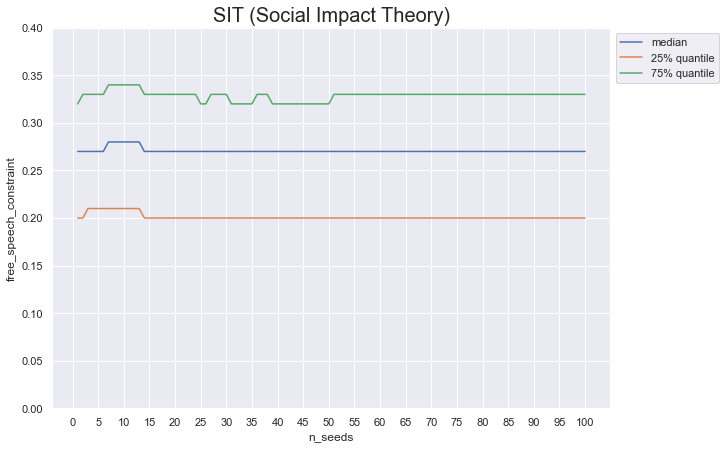

In [16]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

### d) 'n_agents_above_belief_threshold'

In [17]:
metric = 'n_agents_above_belief_threshold'
y_max = 1000
y_min = 750

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

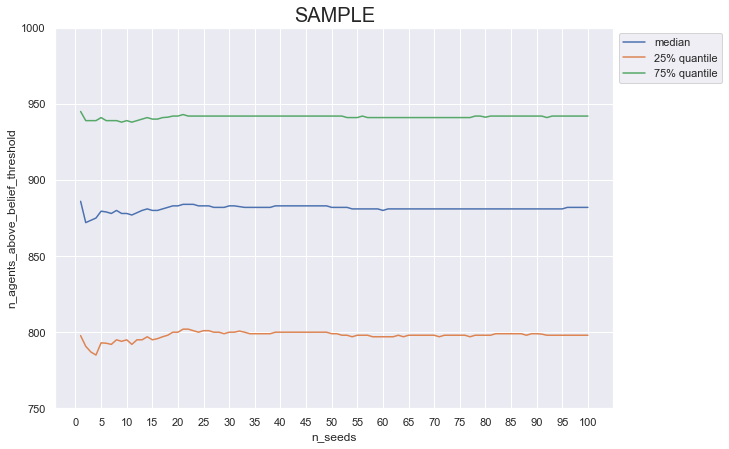

In [18]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

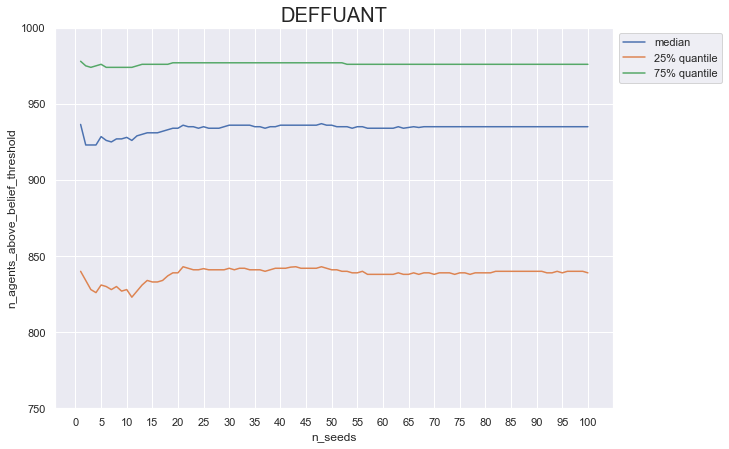

In [19]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

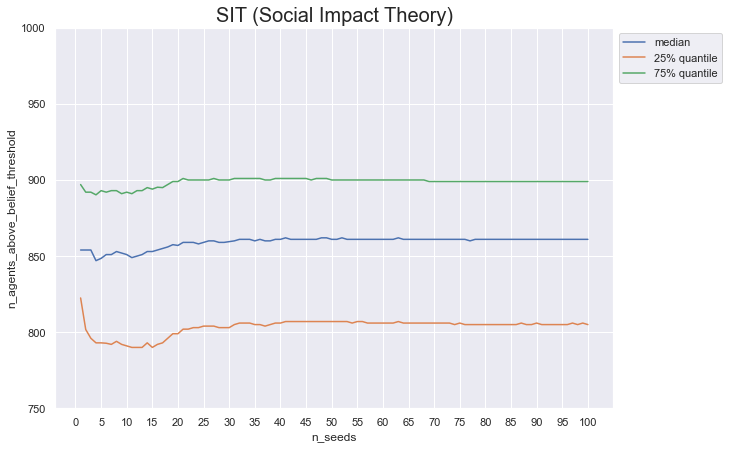

In [20]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_min=y_min, y_max=y_max)

### e) 'polarization_variance'

In [21]:
metric = 'polarization_variance'
y_max = 800

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

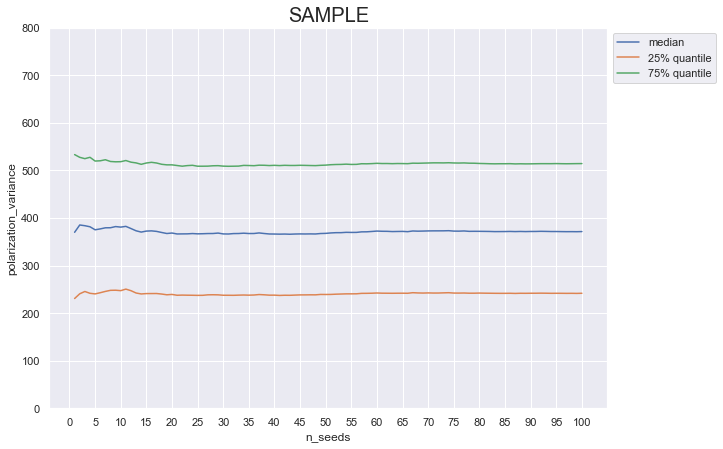

In [22]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

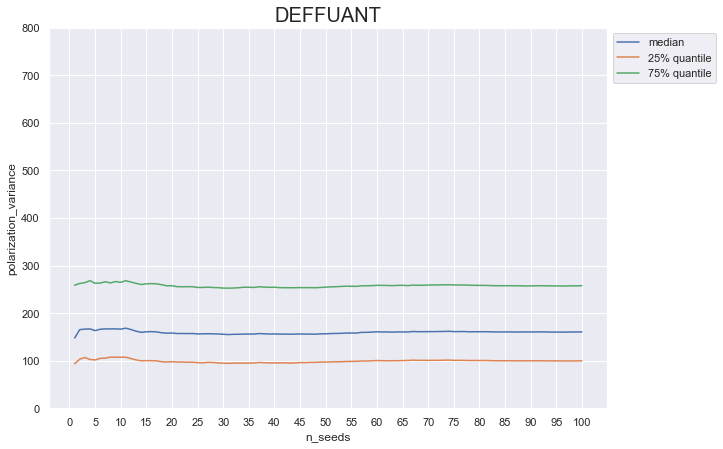

In [23]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

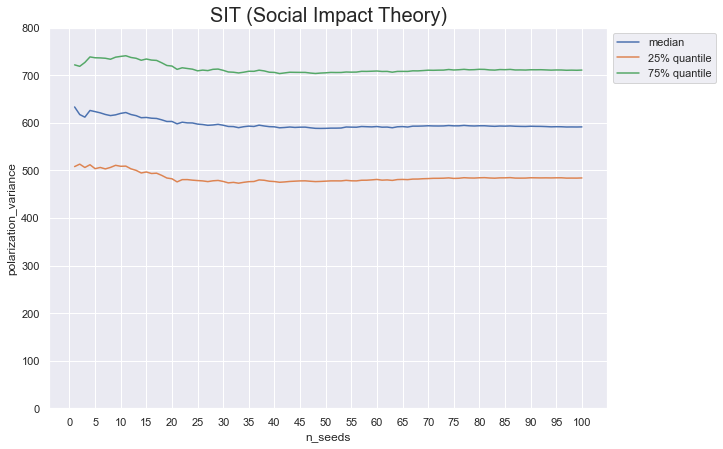

In [24]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)